In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
nurseryNum = pd.read_csv("nursery_numerical.csv")
nurseryNum.columns.values

array(['Parents', ' Has_nurs', ' Form', ' Children', ' Housing',
       ' Finance', ' Social', ' Health', 'Class'], dtype=object)

In [3]:
i = 100
j = 1
features = ['Parents', ' Has_nurs', ' Form', ' Children', ' Housing', ' Finance', ' Social', ' Health']
for index, m in nurseryNum.iterrows():
    if index % 20 == 0:
        nurseryNum.at[index+2, features[j]] = i + 1
        j += 3
        i+=10
        if j >= 7:
            j = 0

In [4]:
i = 0
j = 0
for index, m in nurseryNum.iterrows():
    if index % 20 == 0:
        if index < 12954:
            nurseryNum.at[index+5,:] = nurseryNum.loc[j,:]
        else:
            nurseryNum.at[index+1,:] = nurseryNum.loc[j,:]
        j += 120
        if j >= 12959:
            j = 0

In [6]:
nurseryNum.to_csv('nureryNoise.csv', sep=',')

In [7]:
data = nurseryNum.iloc[:,0:8]
labels = nurseryNum.iloc[:,8]

In [9]:
x = data.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
nurseryNum = pd.concat([df, labels], axis=1)

In [10]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Euclidean and k tuning on 10% noise dataset

In [11]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.82      0.85      0.83      2098
   priority       0.77      0.82      0.79      2152
 spec_prior       0.33      1.00      0.50         2
  recommend       0.87      0.76      0.81      2069
  not_recom       0.55      0.67      0.60       159

avg / total       0.81      0.81      0.81      6480

accuracy:  0.8069444444444445
             precision    recall  f1-score   support

 very_recom       0.82      0.85      0.84      2175
   priority       0.79      0.80      0.79      2115
 spec_prior       1.00      1.00      1.00         5
  recommend       0.85      0.79      0.82      2017
  not_recom       0.60      0.71      0.65       168

avg / total       0.82      0.81      0.81      6480

accuracy:  0.8137345679012346
             precision    recall  f1-score   support

 very_recom       0.81      0.83      0.82      2148
   priority       0.76      0.79      0.78      2133
 spec_prior       0.57      1.00

In [12]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.89      0.94      0.92      2145
   priority       0.85      0.92      0.88      2102
 spec_prior       0.27      1.00      0.43         3
  recommend       0.94      0.83      0.88      2070
  not_recom       0.95      0.65      0.77       160

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8898148148148148
             precision    recall  f1-score   support

 very_recom       0.89      0.94      0.92      2128
   priority       0.87      0.89      0.88      2165
 spec_prior       0.57      1.00      0.73         4
  recommend       0.92      0.85      0.89      2016
  not_recom       0.89      0.71      0.79       167

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8922839506172839
             precision    recall  f1-score   support

 very_recom       0.89      0.94      0.91      2113
   priority       0.86      0.91      0.88      2166
 spec_prior       0.57      1.00

In [13]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.92      0.93      0.93      2134
   priority       0.84      0.91      0.88      2164
 spec_prior       0.00      0.00      0.00         4
  recommend       0.91      0.84      0.87      2005
  not_recom       0.89      0.62      0.73       173

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8871913580246914
             precision    recall  f1-score   support

 very_recom       0.91      0.94      0.93      2139
   priority       0.86      0.90      0.88      2103
 spec_prior       0.75      1.00      0.86         3
  recommend       0.91      0.84      0.87      2081
  not_recom       0.94      0.73      0.82       154

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8924382716049383
             precision    recall  f1-score   support

 very_recom       0.91      0.94      0.92      2112
   priority       0.86      0.90      0.88      2199
 spec_prior       0.43      1.00

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

 very_recom       0.92      0.94      0.93      2161
   priority       0.83      0.90      0.86      2068
 spec_prior       0.00      0.00      0.00         4
  recommend       0.92      0.82      0.87      2101
  not_recom       0.78      0.68      0.73       146

avg / total       0.88      0.88      0.88      6480

accuracy:  0.8833333333333333
             precision    recall  f1-score   support

 very_recom       0.91      0.94      0.92      2117
   priority       0.86      0.91      0.88      2140
 spec_prior       0.00      0.00      0.00         3
  recommend       0.92      0.84      0.88      2070
  not_recom       0.86      0.68      0.76       150

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8930555555555556
             precision    recall  f1-score   support

 very_recom       0.92      0.94      0.93      2156
   priority       0.86      0.91      0.88      2127
 spec_prior       0.00      0.00

In [14]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.93      0.95      0.94      2150
   priority       0.87      0.90      0.89      2160
 spec_prior       0.00      0.00      0.00         4
  recommend       0.90      0.88      0.89      1979
  not_recom       0.90      0.56      0.69       187

avg / total       0.90      0.90      0.90      6480

accuracy:  0.899537037037037
             precision    recall  f1-score   support

 very_recom       0.93      0.93      0.93      2123
   priority       0.84      0.92      0.88      2107
 spec_prior       0.00      0.00      0.00         3
  recommend       0.92      0.84      0.88      2107
  not_recom       0.89      0.70      0.78       140

avg / total       0.90      0.89      0.89      6480

accuracy:  0.8933641975308642
             precision    recall  f1-score   support

 very_recom       0.94      0.92      0.93      2127
   priority       0.84      0.92      0.88      2140
 spec_prior       0.00      0.00 

In [15]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.91      0.96      0.93      2106
   priority       0.88      0.90      0.89      2171
 spec_prior       0.00      0.00      0.00         3
  recommend       0.91      0.87      0.89      2048
  not_recom       0.88      0.66      0.75       152

avg / total       0.90      0.90      0.90      6480

accuracy:  0.9007716049382716
             precision    recall  f1-score   support

 very_recom       0.93      0.92      0.93      2167
   priority       0.84      0.92      0.88      2096
 spec_prior       0.00      0.00      0.00         4
  recommend       0.90      0.87      0.89      2038
  not_recom       0.95      0.44      0.60       175

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8916666666666667
             precision    recall  f1-score   support

 very_recom       0.94      0.94      0.94      2198
   priority       0.86      0.91      0.89      2112
 spec_prior       0.00      0.00

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

 very_recom       0.91      0.95      0.93      2137
   priority       0.86      0.92      0.89      2144
 spec_prior       0.00      0.00      0.00         0
  recommend       0.92      0.86      0.89      2024
  not_recom       0.97      0.53      0.69       175

avg / total       0.90      0.90      0.90      6480

accuracy:  0.8986111111111111
             precision    recall  f1-score   support

 very_recom       0.93      0.93      0.93      2136
   priority       0.86      0.91      0.88      2123
 spec_prior       0.00      0.00      0.00         7
  recommend       0.89      0.85      0.87      2062
  not_recom       0.89      0.61      0.72       152

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8924382716049383
mean accuracy 0.897391975308642


In [16]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.88      0.93      0.90      2100
   priority       0.86      0.89      0.87      2171
 spec_prior       0.00      0.00      0.00         7
  recommend       0.90      0.85      0.87      2036
  not_recom       0.90      0.46      0.61       166

avg / total       0.88      0.88      0.87      6480

accuracy:  0.8771604938271605
             precision    recall  f1-score   support

 very_recom       0.91      0.92      0.91      2173
   priority       0.86      0.89      0.88      2096
 spec_prior       0.87      0.87      0.87      2050
  not_recom       0.99      0.43      0.60       161

avg / total       0.88      0.88      0.88      6480

accuracy:  0.883179012345679
             precision    recall  f1-score   support

 very_recom       0.88      0.94      0.91      2089
   priority       0.86      0.88      0.87      2168
 spec_prior       0.00      0.00      0.00         1
  recommend       0.88      0.86 

In [17]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.87      0.90      0.88      2132
   priority       0.83      0.89      0.86      2141
 spec_prior       0.00      0.00      0.00         5
  recommend       0.89      0.82      0.85      2049
  not_recom       0.85      0.46      0.60       153

avg / total       0.86      0.86      0.86      6480

accuracy:  0.8598765432098765
             precision    recall  f1-score   support

 very_recom       0.85      0.85      0.85      2141
   priority       0.81      0.87      0.84      2126
 spec_prior       0.00      0.00      0.00         2
  recommend       0.84      0.83      0.84      2037
  not_recom       0.96      0.28      0.43       174

avg / total       0.84      0.84      0.83      6480

accuracy:  0.8350308641975308
             precision    recall  f1-score   support

 very_recom       0.86      0.89      0.87      2140
   priority       0.82      0.87      0.85      2129
 spec_prior       0.00      0.00

In [18]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.73      0.81      0.77      2141
   priority       0.79      0.77      0.78      2126
 spec_prior       0.00      0.00      0.00         4
  recommend       0.80      0.77      0.79      2052
  not_recom       0.80      0.15      0.26       157

avg / total       0.77      0.77      0.77      6480

accuracy:  0.7709876543209877
             precision    recall  f1-score   support

 very_recom       0.74      0.80      0.77      2132
   priority       0.77      0.84      0.80      2141
 spec_prior       0.00      0.00      0.00         3
  recommend       0.83      0.75      0.79      2034
  not_recom       0.87      0.12      0.21       170

avg / total       0.78      0.78      0.77      6480

accuracy:  0.7796296296296297
             precision    recall  f1-score   support

 very_recom       0.73      0.80      0.77      2129
   priority       0.78      0.82      0.80      2150
 spec_prior       0.00      0.00

In [19]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

 very_recom       0.64      0.77      0.70      2103
   priority       0.79      0.74      0.76      2177
 spec_prior       0.00      0.00      0.00         1
  recommend       0.80      0.74      0.77      2043
  not_recom       0.92      0.08      0.14       156

avg / total       0.75      0.73      0.73      6480

accuracy:  0.7324074074074074
             precision    recall  f1-score   support

 very_recom       0.71      0.70      0.71      2170
   priority       0.74      0.81      0.77      2090
 spec_prior       0.00      0.00      0.00         6
  recommend       0.78      0.77      0.78      2043
  not_recom       0.67      0.07      0.13       171

avg / total       0.74      0.74      0.73      6480

accuracy:  0.7422839506172839
             precision    recall  f1-score   support

 very_recom       0.67      0.70      0.69      2169
   priority       0.75      0.76      0.75      2093
 spec_prior       0.00      0.00

[0.8041666666666666, 0.8905092592592594, 0.8901388888888888, 0.8932561728395061, 0.897391975308642, 0.8815432098765432, 0.8497376543209876, 0.7779938271604939, 0.7343981481481483]


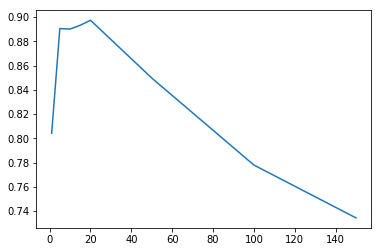

In [20]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 10% noise dataset

In [21]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.80      0.85      0.83      2115
   priority       0.81      0.77      0.79      2184
 spec_prior       0.62      1.00      0.77         5
  recommend       0.82      0.80      0.81      2004
  not_recom       0.57      0.67      0.62       172

avg / total       0.80      0.80      0.80      6480

accuracy:  0.8020061728395061
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.82      0.83      0.83      2158
   priority       0.75      0.82      0.79      2083
 spec_prior       0.40      1.00      0.57         2
  recommend       0.86      0.75      0.80      2082
  not_recom       0.56      0.79      0.66       155

avg / total       0.81      0.80      0.80      6480

accuracy:  0.799074074074074
             precision    recall  f1-sc

In [22]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.90      0.95      0.93      2136
   priority       0.85      0.91      0.88      2128
 spec_prior       0.50      1.00      0.67         3
  recommend       0.94      0.84      0.88      2070
  not_recom       0.89      0.72      0.80       143

avg / total       0.90      0.90      0.89      6480

accuracy:  0.8953703703703704
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.90      0.94      0.92      2137
   priority       0.85      0.90      0.87      2139
 spec_prior       0.31      1.00      0.47         4
  recommend       0.92      0.84      0.88      2016
  not_recom       0.91      0.55      0.69       184

avg / total       0.89      0.89      0.88      6480

accuracy:  0.8859567901234567
set([' very_recom', ' priority', ' spe

In [23]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-score   support

 very_recom       0.92      0.95      0.94      2144
   priority       0.85      0.92      0.88      2149
 spec_prior       0.00      0.00      0.00         3
  recommend       0.93      0.83      0.88      2026
  not_recom       0.87      0.70      0.77       158

avg / total       0.90      0.90      0.90      6480

accuracy:  0.8967592592592593
             precision    recall  f1-score   support

 very_recom       0.92      0.93      0.92      2129
   priority       0.85      0.91      0.88      2118
 spec_prior       0.00      0.00      0.00         4
  recommend       0.91      0.86      0.88      2060
  not_recom       0.94      0.61      0.74       169

avg / total       0.89      0.89      0.89      6480

accuracy:  0.891358024691358
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
             precision    recall  f1-sc

In [24]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


             precision    recall  f1-score   support

 very_recom       0.92      0.94      0.93      2157
   priority       0.84      0.93      0.89      2086
 spec_prior       0.00      0.00      0.00         4
  recommend       0.92      0.84      0.88      2070
  not_recom       0.94      0.63      0.75       163

avg / total       0.90      0.89      0.89      6480

accuracy:  0.8945987654320988
             precision    recall  f1-score   support

 very_recom       0.92      0.93      0.92      2116
   priority       0.86      0.90      0.88      2181
 spec_prior       0.00      0.00      0.00         3
  recommend       0.90      0.86      0.88      2016
  not_recom       0.92      0.63      0.75       164

avg / total       0.89      0.89      0.89      6480

accuracy:  0.8922839506172839
             precision    recall  f1-score   support

 very_recom       0.91      0.94      0.92      2154
   priority       0.85      0.91      0.88      2098
 spec_prior       0.00      0.00

In [25]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


             precision    recall  f1-score   support

 very_recom       0.93      0.95      0.94      2157
   priority       0.88      0.90      0.89      2141
 spec_prior       0.00      0.00      0.00         4
  recommend       0.90      0.88      0.89      2032
  not_recom       0.93      0.61      0.74       146

avg / total       0.90      0.90      0.90      6480

accuracy:  0.9029320987654321
             precision    recall  f1-score   support

 very_recom       0.90      0.94      0.92      2116
   priority       0.84      0.92      0.88      2126
 spec_prior       0.00      0.00      0.00         3
  recommend       0.92      0.84      0.88      2054
  not_recom       0.95      0.50      0.65       181

avg / total       0.89      0.89      0.88      6480

accuracy:  0.8859567901234567
             precision    recall  f1-score   support

 very_recom       0.91      0.94      0.92      2110
   priority       0.86      0.91      0.89      2124
 spec_prior       0.00      0.00

In [26]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


             precision    recall  f1-score   support

 very_recom       0.91      0.91      0.91      2176
   priority       0.85      0.90      0.87      2137
 spec_prior       0.00      0.00      0.00         4
  recommend       0.88      0.86      0.87      1996
  not_recom       0.96      0.51      0.67       167

avg / total       0.88      0.88      0.88      6480

accuracy:  0.878858024691358
             precision    recall  f1-score   support

 very_recom       0.88      0.94      0.91      2097
   priority       0.86      0.88      0.87      2130
 spec_prior       0.00      0.00      0.00         3
  recommend       0.90      0.86      0.88      2090
  not_recom       0.92      0.42      0.58       160

avg / total       0.88      0.88      0.88      6480

accuracy:  0.8794753086419753
             precision    recall  f1-score   support

 very_recom       0.91      0.93      0.92      2149
   priority       0.85      0.90      0.87      2133
 spec_prior       0.00      0.00 

In [27]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


             precision    recall  f1-score   support

 very_recom       0.85      0.88      0.86      2127
   priority       0.81      0.88      0.85      2122
 spec_prior       0.00      0.00      0.00         6
  recommend       0.88      0.81      0.84      2070
  not_recom       0.89      0.37      0.53       155

avg / total       0.85      0.85      0.84      6480

accuracy:  0.8453703703703703
             precision    recall  f1-score   support

 very_recom       0.84      0.88      0.86      2146
   priority       0.82      0.86      0.84      2145
 spec_prior       0.00      0.00      0.00         1
  recommend       0.86      0.82      0.84      2016
  not_recom       0.98      0.28      0.44       172

avg / total       0.84      0.84      0.84      6480

accuracy:  0.8401234567901235
             precision    recall  f1-score   support

 very_recom       0.84      0.88      0.86      2113
   priority       0.84      0.88      0.86      2158
 spec_prior       0.00      0.00

In [28]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


             precision    recall  f1-score   support

 very_recom       0.70      0.85      0.76      2081
   priority       0.83      0.77      0.80      2197
 spec_prior       0.00      0.00      0.00         3
  recommend       0.82      0.76      0.79      2038
  not_recom       0.89      0.19      0.32       161

avg / total       0.79      0.78      0.77      6480

accuracy:  0.7762345679012346
             precision    recall  f1-score   support

 very_recom       0.77      0.76      0.77      2192
   priority       0.76      0.82      0.79      2070
 spec_prior       0.00      0.00      0.00         4
  recommend       0.78      0.79      0.78      2048
  not_recom       0.83      0.11      0.20       166

avg / total       0.77      0.77      0.77      6480

accuracy:  0.7723765432098766
             precision    recall  f1-score   support

 very_recom       0.75      0.79      0.77      2120
   priority       0.79      0.80      0.79      2138
 spec_prior       0.00      0.00

In [29]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


             precision    recall  f1-score   support

 very_recom       0.68      0.72      0.70      2160
   priority       0.75      0.77      0.76      2137
 spec_prior       0.00      0.00      0.00         4
  recommend       0.78      0.76      0.77      2013
  not_recom       0.71      0.06      0.11       166

avg / total       0.73      0.73      0.72      6480

accuracy:  0.7317901234567902
             precision    recall  f1-score   support

 very_recom       0.64      0.73      0.68      2113
   priority       0.75      0.74      0.75      2130
 spec_prior       0.00      0.00      0.00         3
  recommend       0.79      0.74      0.77      2073
  not_recom       0.73      0.05      0.09       161

avg / total       0.73      0.72      0.72      6480

accuracy:  0.7219135802469135
             precision    recall  f1-score   support

 very_recom       0.71      0.69      0.70      2175
   priority       0.76      0.81      0.78      2120
 spec_prior       0.00      0.00

[0.8004475308641975, 0.8899382716049384, 0.8934567901234567, 0.8936574074074075, 0.8976388888888888, 0.8804783950617285, 0.8470524691358022, 0.7784722222222223, 0.7331790123456791]


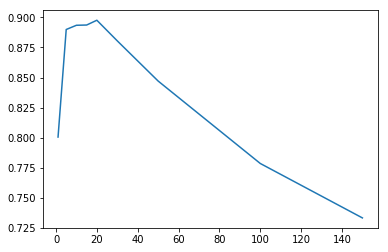

In [30]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

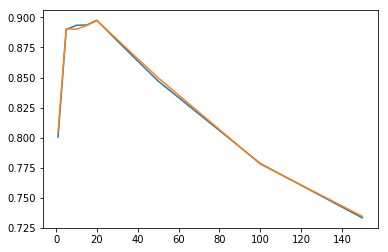

In [31]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()